### コンクリートの配合から強度を推測する回帰問題

In [20]:
import sys
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import  accuracy_score

import xgboost as xgb
from xgboost import XGBRegressor

from math import sqrt

In [2]:
# コンクリートデータの読み込み
concrete = pd.read_csv('concrete_data.csv')

In [3]:
concrete.shape

(1030, 9)

In [4]:
concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
concrete.columns = ['Cement', 'Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarseaggregate', 'Fine Aggregate', 'Age', 'csMpa' ]

In [6]:
concrete.head()

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarseaggregate,Fine Aggregate,Age,csMpa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
# 欠損値の確認
concrete.isnull().sum()

Cement              0
Slag                0
Fly Ash             0
Water               0
Superplasticizer    0
Coarseaggregate     0
Fine Aggregate      0
Age                 0
csMpa               0
dtype: int64

In [8]:
concrete.describe()

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarseaggregate,Fine Aggregate,Age,csMpa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


C:\Users\owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


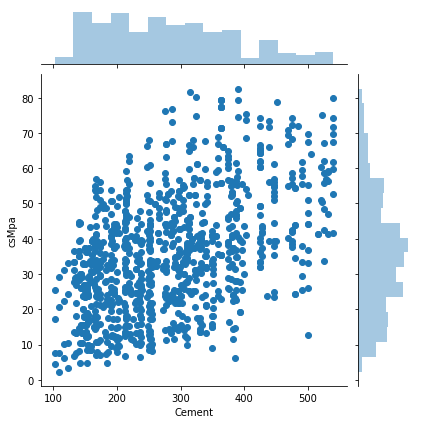

In [9]:
# 散布図
sns.jointplot('Cement', 'csMpa', data=concrete, kind='scatter')

In [10]:
concrete.corr()['Cement']['csMpa']

0.4978319193241571

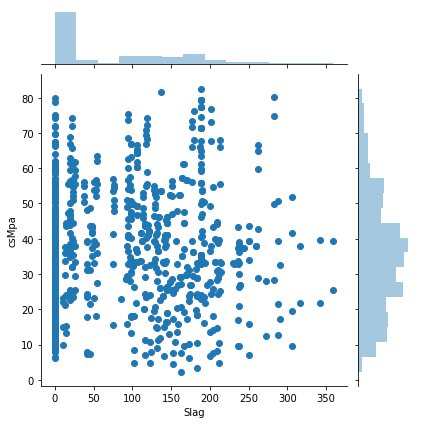

In [11]:
sns.jointplot('Slag', 'csMpa', data=concrete, kind='scatter')

In [12]:
concrete.corr()['Slag']['csMpa']

0.1348292614974053

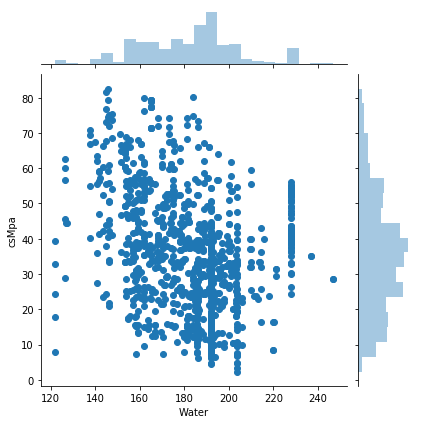

In [13]:
sns.jointplot('Water', 'csMpa', data=concrete, kind='scatter')

In [14]:
concrete.corr()['Water']['csMpa']

-0.28963338498530383

Cement
0.4978319193241571
Slag
0.1348292614974053
Fly Ash
-0.10575491629731298
Water
-0.28963338498530383
Superplasticizer
0.36607882718852036
Coarseaggregate
-0.1649346144601093
Fine Aggregate
-0.16724124729005843
Age
0.32887300077998355


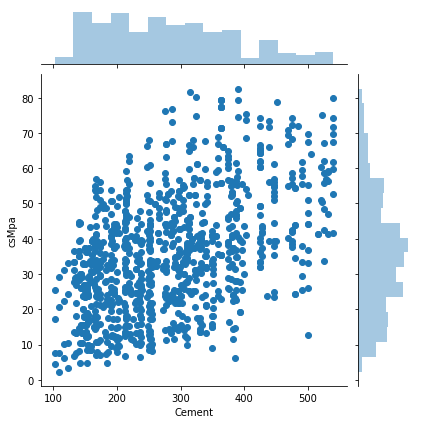

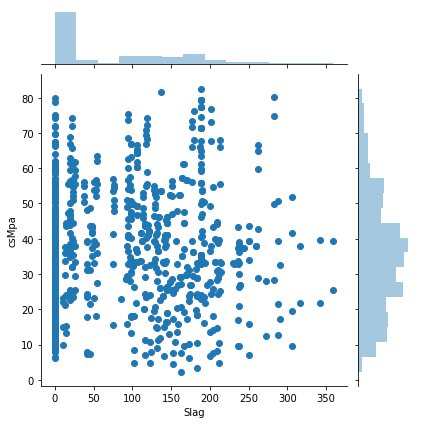

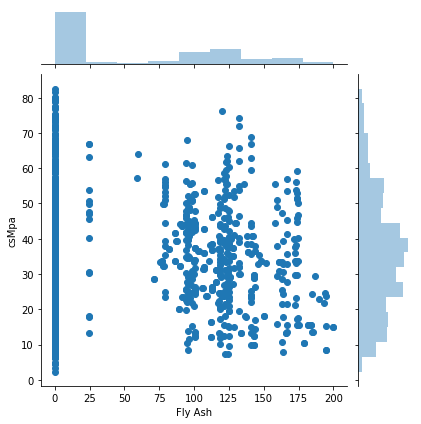

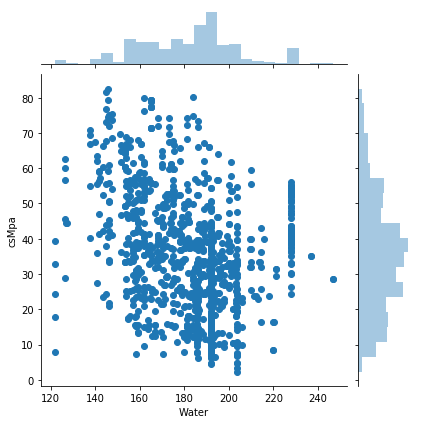

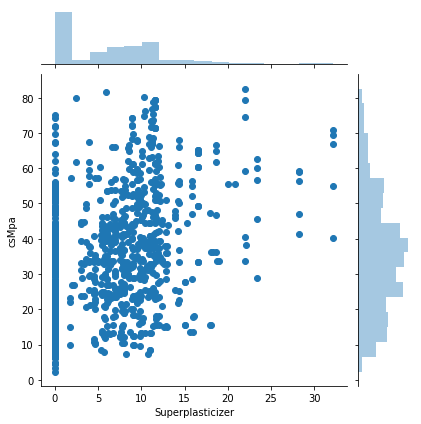

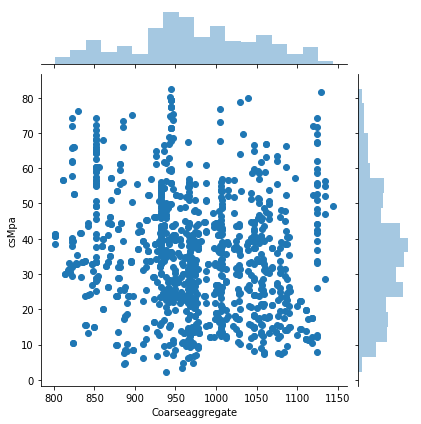

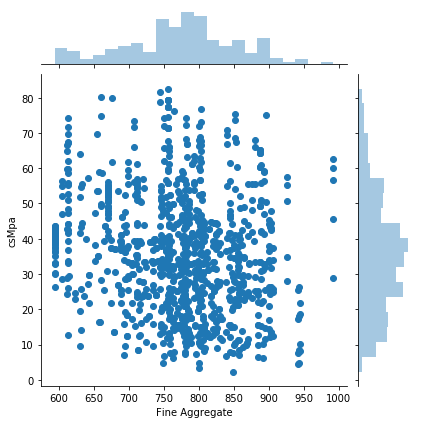

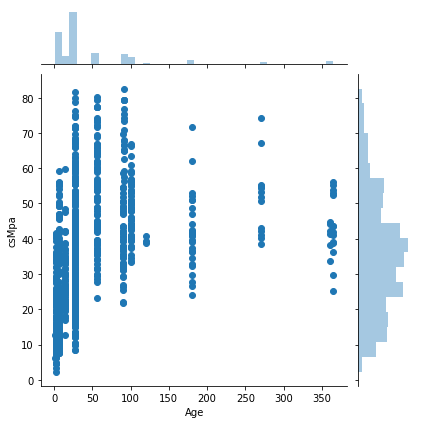

In [15]:
# plt.figure(figsize=(15, 8 * 5))
# gs = gridspec.GridSpec(8, 2)
for i , col in enumerate(concrete.columns[:-1]):
# for i , col in enumerate(concrete.columns[:1]):
    print(col)
    print(concrete.corr()[col]['csMpa'])
#     ax = plt.subplot(gs[i])
    sns.jointplot(col, 'csMpa', data=concrete, kind='scatter')

In [17]:
train_set, test_set = train_test_split(concrete, test_size=0.2, random_state=42)

In [18]:
X_train = train_set.drop('csMpa', axis=1)
y_train = train_set['csMpa'].copy()

X_test= test_set.drop('csMpa', axis=1)
y_test = test_set['csMpa'].copy()

In [19]:
# XGBoost ベース（デフォルトをベースラインにする）
xgboost_base = XGBRegressor()

# 訓練
xgboost_base.fit(X_train, y_train)

C:\Users\owner\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:21:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [30]:
# テストデータで推測
y_pred_test = xgboost_base.predict(X_test)

In [34]:
y_pred_test[:5]

array([49.388134, 45.155766, 69.9516  , 34.783825, 13.44883 ],
      dtype=float32)

In [35]:
y_test[:5]

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
Name: csMpa, dtype: float64

In [36]:
# ベースラインモデルのRMSE
mean_squared_error(y_test, y_pred_test)

29.25332878017713

In [38]:
sqrt(mean_squared_error(y_test, y_pred_test))

5.408634650277012